<a href="https://colab.research.google.com/github/brunopdrocha/ibmec_computer_vision/blob/main/AC3_CV_Border_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Border Dectection in Pyhton
This content has a proposal to analyse a image and define these borders using computer vision libraries in Python

In [1]:
# Import libs for computer vision
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Image to analyse



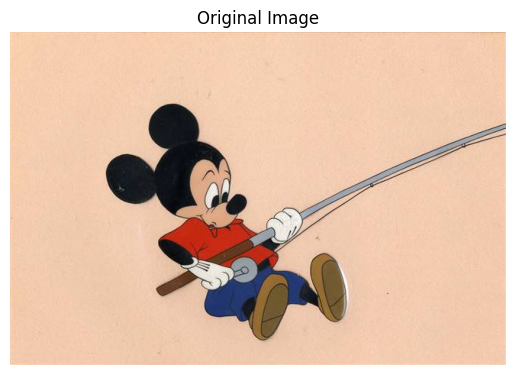

In [2]:
# Image that we gonna explore
img = cv.imread('/content/WDCCS1119-2T.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Fix color channels
plt.title('Original Image')
plt.imshow(img_rgb)  # Remove cmap='gray' for color images
plt.axis('off')  # Optional: Hide axes
plt.show()

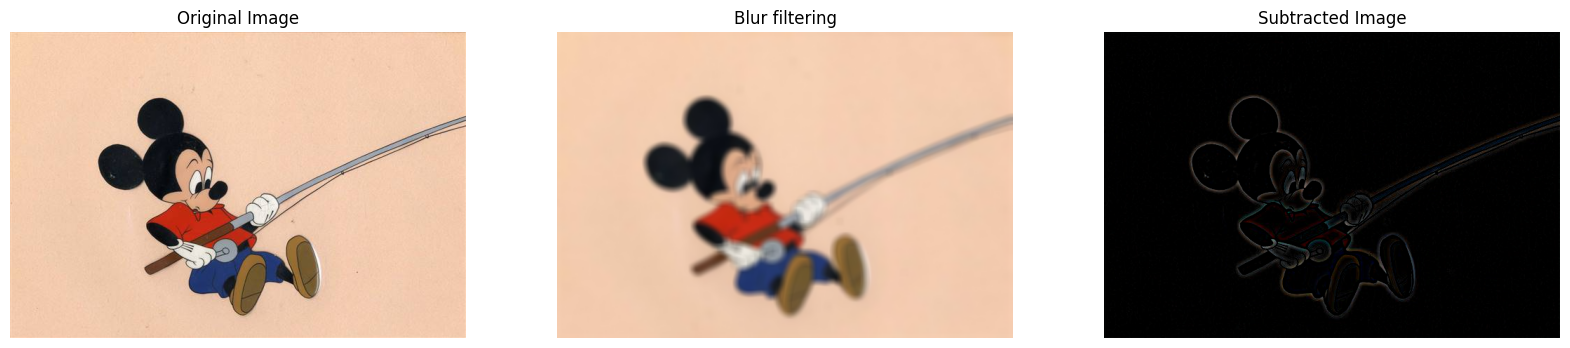

In [13]:
# Default blur

dst1 = cv.blur(img, (11, 11))

# Subtracted Image
img_subtracted_blur = cv.subtract(img, dst1)

# Plotting Images
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title("Original Image")

ax[1].imshow(cv.cvtColor(dst1, cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].set_title("Blur filtering")

ax[2].imshow(cv.cvtColor(img_subtracted_blur, cv.COLOR_BGR2RGB))
ax[2].axis('off')
ax[2].set_title("Subtracted Image")

plt.show()

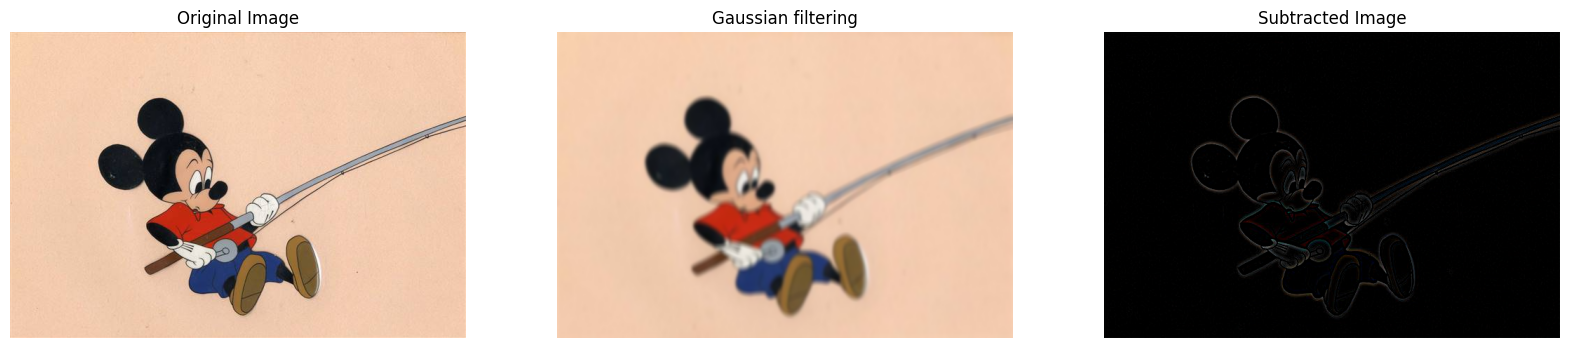

In [14]:
# Gaussian Blur

dst2 = cv.GaussianBlur(img,(11,11),0,0,cv.BORDER_DEFAULT)

# Subtracted Image
img_subtracted_gaussian = cv.subtract(img, dst2)

# Plotting Images
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title("Original Image")

ax[1].imshow(cv.cvtColor(dst2, cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].set_title("Gaussian filtering")

ax[2].imshow(cv.cvtColor(img_subtracted_gaussian, cv.COLOR_BGR2RGB))
ax[2].axis('off')
ax[2].set_title("Subtracted Image")

plt.show()

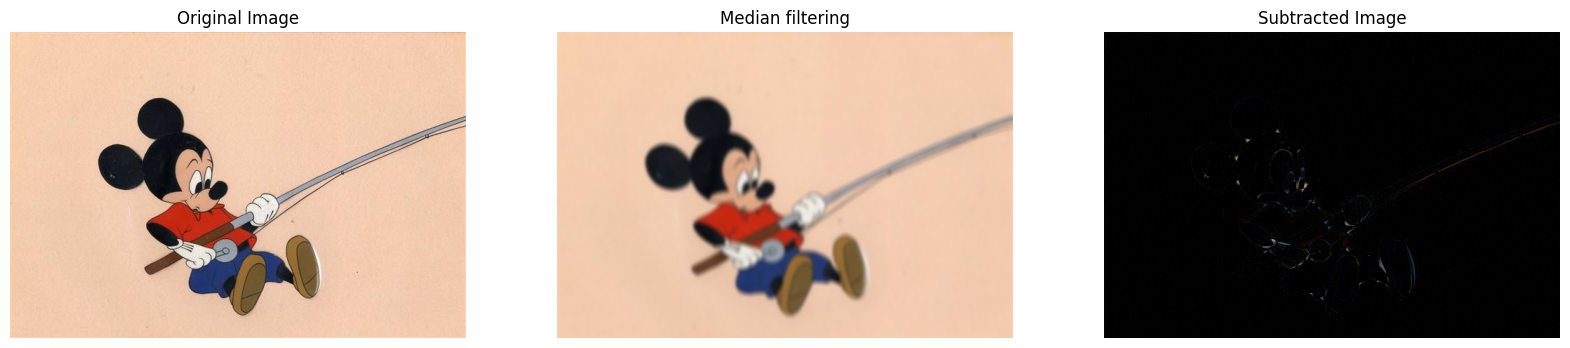

In [15]:
# Median Blur

dst3 = cv.medianBlur(img,11)

# Subtracted Image
img_subtracted_median = cv.subtract(img, dst3)

# Plotting Images
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title("Original Image")

ax[1].imshow(cv.cvtColor(dst2, cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].set_title("Median filtering")

ax[2].imshow(cv.cvtColor(img_subtracted_median, cv.COLOR_BGR2RGB))
ax[2].axis('off')
ax[2].set_title("Subtracted Image")

plt.show()

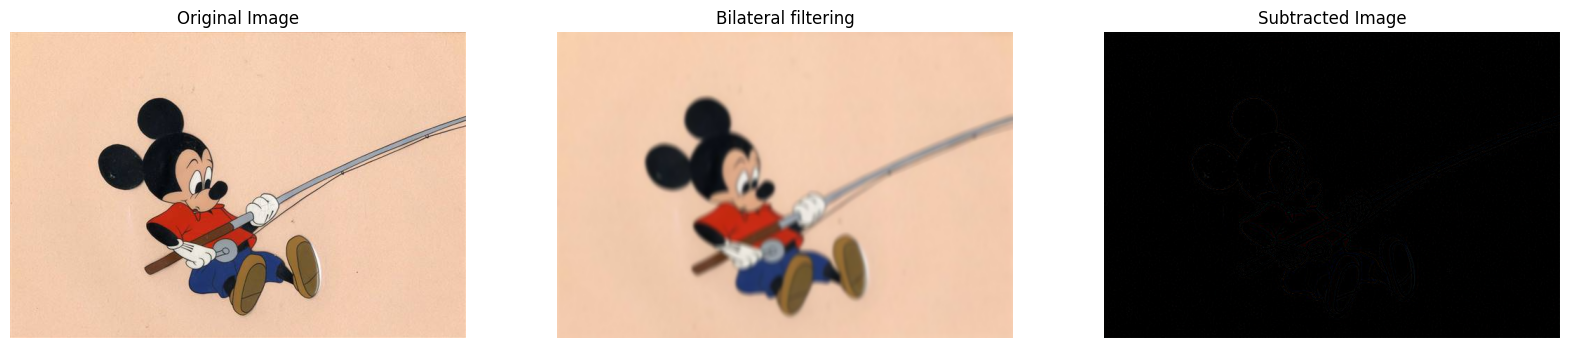

In [16]:
#Bilateral Filtering

dst4 = cv.bilateralFilter(img,9,75,75)


# Subtracted Image
img_subtracted_bilateral = cv.subtract(img, dst4)

# Plotting Images
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title("Original Image")

ax[1].imshow(cv.cvtColor(dst2, cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].set_title("Bilateral filtering")

ax[2].imshow(cv.cvtColor(img_subtracted_bilateral, cv.COLOR_BGR2RGB))
ax[2].axis('off')
ax[2].set_title("Subtracted Image")
plt.show()

According to the four filtering cases we will analyse the border using the subtracted image from the gaussian filtering


## Analyse Borders


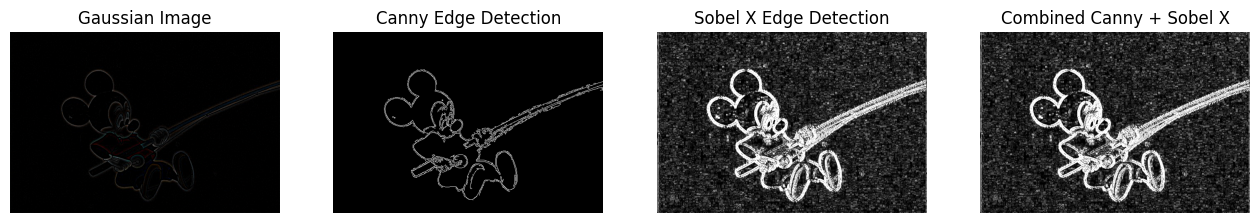

In [26]:
# Canny
edges_canny = cv.Canny(gray_sub, 50, 150)

# Sobel (horizontal)
sobel_x = cv.Sobel(gray_sub, cv.CV_64F, 1, 0, ksize=5)
sobel_x = cv.convertScaleAbs(sobel_x)  # Converte para imagem visível

# Combined
combined_edges = cv.bitwise_or(edges_canny, sobel_x)

# Visualize os dois

fig, ax = plt.subplots(1, 4, figsize=(16, 10))
ax[0].imshow(cv.cvtColor(img_subtracted_gaussian, cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title("Gaussian Image")


ax[1].imshow(edges_canny, cmap='gray')
ax[1].set_title('Canny Edge Detection')
ax[1].axis('off')

ax[2].imshow(sobel_x, cmap='gray')
ax[2].set_title('Sobel X Edge Detection')
ax[2].axis('off')

ax[3].imshow(combined_edges, cmap='gray')
ax[3].set_title('Combined Canny + Sobel X')
ax[3].axis('off')

plt.show()


- Canny Edge Detection: This method identifies sharp and well-defined edges by analyzing intensity gradients through the application of non-maximum suppression and double thresholding, thereby ensuring precise edge localization.

- Sobel X Detection: This technique emphasizes horizontal intensity variations, capturing a broader range of gradient information, albeit with an increased presence of noise.

- Combined Canny and Sobel Approach: By integrating both methods, this approach enhances edge detection performance—utilizing Canny to achieve high precision and Sobel to provide detailed gradient information.

In my assessment, with reference to the Mickey Mouse image, the combined methodology represents the most effective strategy for border analysis, as it harmonizes the accuracy of Canny with the comprehensive gradient detail offered by Sobel, resulting in superior edge delineation.